In [1]:
import zipfile
zip_ref = zipfile.ZipFile('cat-or-dog-image-classification.zip', 'r')
zip_ref.extractall('dataset')
zip_ref.close()

In [2]:
# import all the required libraies to create a CNN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [3]:
# There are lot of image we uplod the image with the help of batch size that why we create a one generator function
train_data = tf.keras.utils.image_dataset_from_directory(
    directory = 'dataset\Train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    directory = 'dataset\Test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:11: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:11: SyntaxWarning: invalid escape sequence '\T'
C:\Users\adakb\AppData\Local\Temp\ipykernel_17200\717363302.py:3: SyntaxWarning: invalid escape sequence '\T'
  directory = 'dataset\Train',
C:\Users\adakb\AppData\Local\Temp\ipykernel_17200\717363302.py:11: SyntaxWarning: invalid escape sequence '\T'
  directory = 'dataset\Test',


Found 23650 files belonging to 2 classes.
Found 3863 files belonging to 2 classes.


In [4]:
# Gives the numpy array where all the value between 0 to 255 to normalize into 0 to 1
# Means we perform Normalize
def process(image, shape):
  image = tf.cast(image/255., tf.float32)
  return image,shape

train_data = train_data.map(process)
validation_data = validation_data.map(process)

In [5]:
# Now create a CNN model
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (256,256,3)),
    MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid'),
    BatchNormalization(),

    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid'),
    BatchNormalization(),

    Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(pool_size = 2, strides = 2, padding = 'valid'),
    BatchNormalization(),

    Flatten(),

    Dense(128, activation = 'relu'),
    Dropout(0.2),

    Dense(64, activation = 'relu'),
    Dropout(0.2),

    Dense(32, activation = 'relu'),
    Dropout(0.2),

    Dense(1, activation = 'sigmoid')
])

c:\Users\adakb\OneDrive\Desktop\cat-Dog-classifier\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,881,857 (64.40 MB)

 Trainable params: 16,881,409 (64.40 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
# compile the model
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
# train the model
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = 'dog_cat_cnn_model.keras'

checkpointer = ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_best_only = True,
)

model.fit(train_data, epochs = 10, validation_data = validation_data, callbacks = [checkpointer])

Epoch 1/10


740/740 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5384 - loss: 1.6711
Epoch 1: val_loss improved from None to 0.60960, saving model to dog_cat_cnn_model.keras
740/740 ━━━━━━━━━━━━━━━━━━━━ 1072s 1s/step - accuracy: 0.5588 - loss: 1.0113 - val_accuracy: 0.6446 - val_loss: 0.6096
Epoch 2/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6545 - loss: 0.6217
Epoch 2: val_loss improved from 0.60960 to 0.52018, saving model to dog_cat_cnn_model.keras
740/740 ━━━━━━━━━━━━━━━━━━━━ 976s 1s/step - accuracy: 0.6804 - loss: 0.5979 - val_accuracy: 0.7510 - val_loss: 0.5202
Epoch 3/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 0s 975ms/step - accuracy: 0.7235 - loss: 0.5531
Epoch 3: val_loss improved from 0.52018 to 0.48035, saving model to dog_cat_cnn_model.keras
740/740 ━━━━━━━━━━━━━━━━━━━━ 750s 1s/step - accuracy: 0.7342 - loss: 0.5350 - val_accuracy: 0.7673 - val_loss: 0.4803
Epoch 4/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 0s 937ms/step - accuracy: 0.7578 - loss: 0.4978
Epoch 4: val_loss improved from 0.480

In [8]:
model.save('cat_dog_cnn_model.keras')

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image(image_path, model):

  img = cv2.imread(image_path)

  if img is None:
    raise ValueError(f"Image at {image_path} not found or can not be opend")
  else:
    plt.imshow(img)


  img = cv2.resize(img, (256,256))
  img = img.astype('float32') / 255

  img = np.expand_dims(img, axis = 0) # (1,256,256,3)

  prediction = model.predict(img)
  return 'cat' if prediction < 0.5 else 'dog'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


'cat'

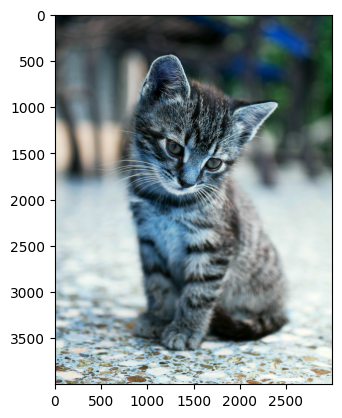

In [ ]:
predict_image('test image\cat image.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


'cat'

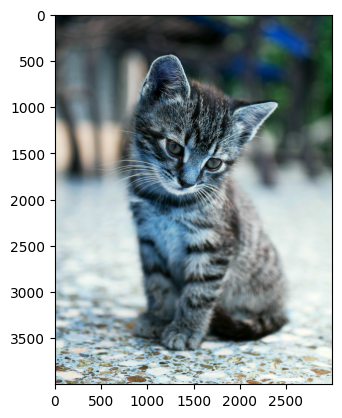

In [ ]:
predict_image('test image\cat1 image.jpeg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


'dog'

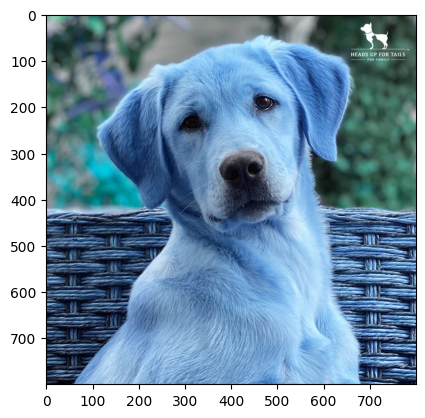

In [ ]:
predict_image('test image\Dog_image.webp', model)